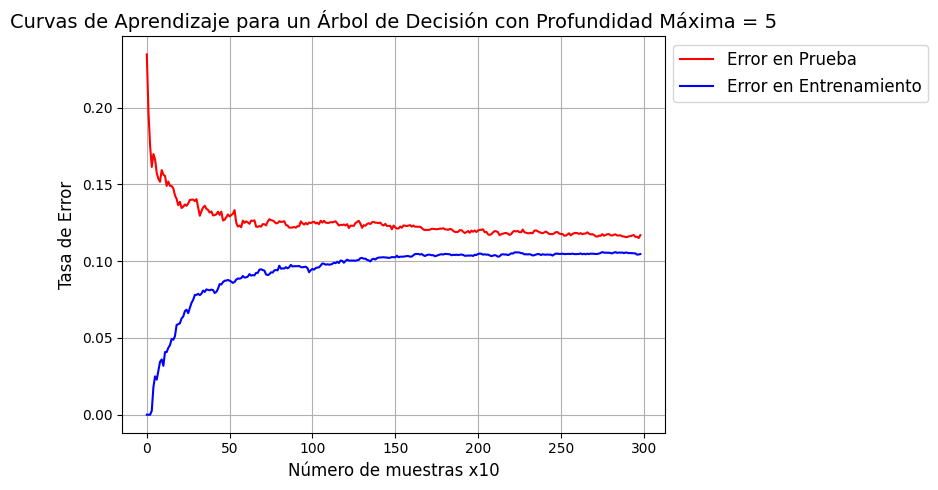

In [ ]:
# Asegurar que las gráficas se muestren en línea en el Jupyter Notebook
%matplotlib inline
# Importar las bibliotecas necesarias.
import numpy as np # Para operaciones numéricas.
import matplotlib.pyplot as plt # Para graficar gráficos.
from sklearn import metrics # Para calcular métricas de rendimiento del modelo.
from sklearn import tree
# Para utilizar modelos de árbol de decisión.
# Establecer la semilla para la aleatorización (asegura resultados repetibles).
np.random.seed(42)
# Establecer la complejidad del árbol de decisión en 5 (profundidad máxima de 5).
C = 5 # Profundidad máxima del árbol de decisión (establecido en 5).
MAXN = 1000 # Número máximo de muestras por clase.

# Inicializar matrices para almacenar las tasas de error para 10 iteraciones y diferentes números de muestras de entrenamiento.
yhat_test_c5 = np.zeros((10, 299, 2)) # Error en prueba (tamaño:[iteraciones, tamaños de muestra, conjunto])
yhat_train_c5 = np.zeros((10, 299, 2)) # Error en entrenamiento

# Ejecutar el experimento 10 veces para obtener curvas suavizadas promedio.
for iteration in range(10):
    # Generar datos sintéticos para el conjunto de entrenamiento.
    # Usar distribuciones normales para crear datos representativos.
    X_train = np.concatenate([
        1.25 * np.random.randn(MAXN, 2), # Primera distribución
        5 + 1.5 * np.random.randn(MAXN, 2), # Segunda distribución
        [8, 5] + 1.5 * np.random.randn(MAXN, 2) # Tercera distribución
    ])
    y_train = np.concatenate([
        np.ones((MAXN, 1)), # Etiquetas para la primera clase
        -np.ones((MAXN, 1)), # Etiquetas para la segunda clase
        np.ones((MAXN, 1)) # Etiquetas para la tercera clase
    ])

    # Aleatorizar los datos para asegurar la variabilidad.
    perm = np.random.permutation(y_train.size)
    X_train = X_train[perm, :]
    y_train = y_train[perm]

    # Generar datos sintéticos para el conjunto de prueba.
    X_test = np.concatenate([
        1.25 * np.random.randn(MAXN, 2),
        5 + 1.5 * np.random.randn(MAXN, 2),
        [8, 5] + 1.5 * np.random.randn(MAXN, 2)
    ])
    y_test = np.concatenate([
        np.ones((MAXN, 1)),
        -np.ones((MAXN, 1)),
        np.ones((MAXN, 1))
    ])

    # Evaluar el modelo con diferentes tamaños de muestra.
    for j, N in enumerate(range(10, 3000, 10)):
        # Tomar un subconjunto de datos para entrenamiento con los primeros N ejemplos.
        X_subset = X_train[:N, :]
        y_subset = y_train[:N]
        # Crear y entrenar un clasificador de árbol de decisión con una profundidad máxima de C (ahora 5).
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X_subset, y_subset.ravel()) # Ajustar el modelo a los datos de entrenamiento.
        # Evaluar el modelo en el conjunto de prueba y calcular la tasa de error.
        yhat_test_c5[iteration, j, 1] = 1 -  metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        # Evaluar el modelo en el conjunto de entrenamiento y calcular la tasa de error.
        yhat_train_c5[iteration, j, 1] = 1 -  metrics.accuracy_score(clf.predict(X_subset), y_subset.ravel())

# Promediar las tasas de error a lo largo de las iteraciones para obtener una curva de aprendizaje más estable.
mean_test_error_c5 = np.mean(yhat_test_c5[:, :, 1].T, axis=1)
mean_train_error_c5 = np.mean(yhat_train_c5[:, :, 1].T, axis=1)

# Graficar las curvas de aprendizaje: tasa de error en prueba y entrenamiento.
plt.figure(figsize=(9, 5))
plt.plot(mean_test_error_c5, 'r', label='Error en Prueba') # Error en el conjunto de prueba.
plt.plot(mean_train_error_c5, 'b', label='Error en Entrenamiento') # Error en el conjunto de entrenamiento.

# Configurar etiquetas, título y leyenda.
plt.xlabel('Número de muestras x10', fontsize=12)
plt.ylabel('Tasa de Error', fontsize=12)
plt.title('Curvas de Aprendizaje para un Árbol de Decisión con Profundidad Máxima = 5', fontsize=14)
plt.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

# Mostrar la gráfica con las curvas de error.
plt.grid(True)
plt.tight_layout() # Ajustar la distribución para evitar que las etiquetas se corten.
plt.show()

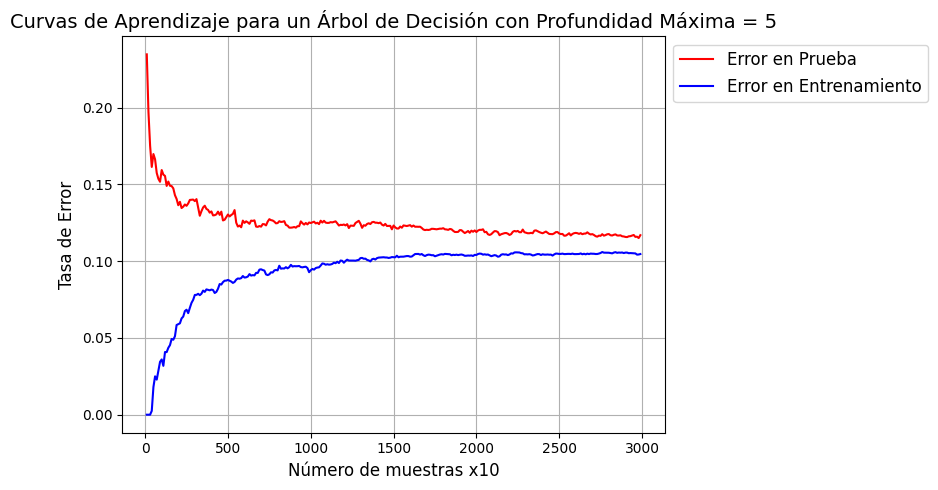

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree, metrics

np.random.seed(42)

# Establecer la complejidad del árbol de decisión en 5 (profundidad máxima de 5).
C = 5  # Profundidad máxima del árbol de decisión (establecido en 5).
MAXN = 1000  # Número máximo de muestras por clase.

# Inicializar dataframes para almacenar las tasas de error para 10 iteraciones y diferentes números de muestras de entrenamiento.
yhat_test_c5 = pd.DataFrame(np.zeros((10, 299)), columns=range(10, 3000, 10))  # Error en prueba
yhat_train_c5 = pd.DataFrame(np.zeros((10, 299)), columns=range(10, 3000, 10))  # Error en entrenamiento

# Ejecutar el experimento 10 veces para obtener curvas suavizadas promedio.
for iteration in range(10):
    # Generar datos sintéticos para el conjunto de entrenamiento.
    X_train = pd.DataFrame(
        np.concatenate([
            1.25 * np.random.randn(MAXN, 2),  # Primera distribución
            5 + 1.5 * np.random.randn(MAXN, 2),  # Segunda distribución
            [8, 5] + 1.5 * np.random.randn(MAXN, 2)  # Tercera distribución
        ]), columns=['feature1', 'feature2']
    )
    y_train = pd.DataFrame(
        np.concatenate([
            np.ones((MAXN, 1)),  # Etiquetas para la primera clase
            -np.ones((MAXN, 1)),  # Etiquetas para la segunda clase
            np.ones((MAXN, 1))  # Etiquetas para la tercera clase
        ]), columns=['label']
    )

    # Aleatorizar los datos para asegurar la variabilidad.
    data_train = pd.concat([X_train, y_train], axis=1).sample(frac=1).reset_index(drop=True)
    X_train = data_train[['feature1', 'feature2']]
    y_train = data_train['label']

    # Generar datos sintéticos para el conjunto de prueba.
    X_test = pd.DataFrame(
        np.concatenate([
            1.25 * np.random.randn(MAXN, 2),
            5 + 1.5 * np.random.randn(MAXN, 2),
            [8, 5] + 1.5 * np.random.randn(MAXN, 2)
        ]), columns=['feature1', 'feature2']
    )
    y_test = pd.DataFrame(
        np.concatenate([
            np.ones((MAXN, 1)),
            -np.ones((MAXN, 1)),
            np.ones((MAXN, 1))
        ]), columns=['label']
    )

    # Evaluar el modelo con diferentes tamaños de muestra.
    for N in range(10, 3000, 10):
        j = (N - 10) // 10  # Índice para almacenar los resultados

        # Tomar un subconjunto de datos para entrenamiento con los primeros N ejemplos.
        X_subset = X_train.iloc[:N, :]
        y_subset = y_train.iloc[:N]

        # Crear y entrenar un clasificador de árbol de decisión con una profundidad máxima de C (ahora 5).
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X_subset, y_subset)

        # Evaluar el modelo en el conjunto de prueba y calcular la tasa de error.
        yhat_test_c5.iloc[iteration, j] = 1 - metrics.accuracy_score(clf.predict(X_test), y_test['label'])

        # Evaluar el modelo en el conjunto de entrenamiento y calcular la tasa de error.
        yhat_train_c5.iloc[iteration, j] = 1 - metrics.accuracy_score(clf.predict(X_subset), y_subset)

# Promediar las tasas de error a lo largo de las iteraciones para obtener una curva de aprendizaje más estable.
mean_test_error_c5 = yhat_test_c5.mean(axis=0)
mean_train_error_c5 = yhat_train_c5.mean(axis=0)


# # Promediar las tasas de error a lo largo de las iteraciones para obtener una curva de aprendizaje más estable.
# mean_test_error_c5 = np.mean(yhat_test_c5[:, :, 1].T, axis=1)
# mean_train_error_c5 = np.mean(yhat_train_c5[:, :, 1].T, axis=1)
mean_test_error_c5 = yhat_test_c5.mean(axis=0)
mean_train_error_c5 = yhat_train_c5.mean(axis=0)

# Graficar las curvas de aprendizaje: tasa de error en prueba y entrenamiento.
plt.figure(figsize=(9, 5))
plt.plot(mean_test_error_c5, 'r', label='Error en Prueba') # Error en el conjunto de prueba.
plt.plot(mean_train_error_c5, 'b', label='Error en Entrenamiento') # Error en el conjunto de entrenamiento.

# Configurar etiquetas, título y leyenda.
plt.xlabel('Número de muestras x10', fontsize=12)
plt.ylabel('Tasa de Error', fontsize=12)
plt.title('Curvas de Aprendizaje para un Árbol de Decisión con Profundidad Máxima = 5', fontsize=14)
plt.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

# Mostrar la gráfica con las curvas de error.
plt.grid(True)
plt.tight_layout() # Ajustar la distribución para evitar que las etiquetas se corten.
plt.show()